In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '../data/142_49/'
X = np.load(path+'resultX.npy')
print(X.shape)
X = X.reshape(X.shape[0], 1723+78, 2)
print(X.shape)

species = np.load(path+'species.npy')
region = np.load(path+'region.npy')


(17, 3602)
(17, 1801, 2)


In [4]:
# fig = plt.figure()
X0 = X[0,:]
print(X0.shape)

# Get the species out 

(1801, 2)


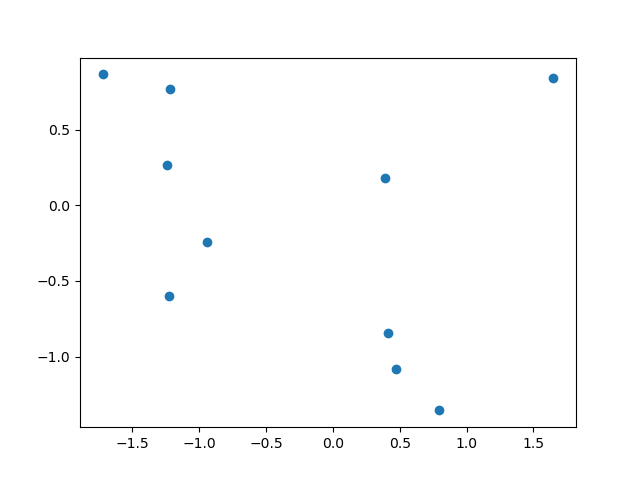

In [16]:
X0 = X[16]
curr = X0[0:10]

%matplotlib widget
plt.scatter(curr[:,0], curr[:, 1])
plt.show('test.png')

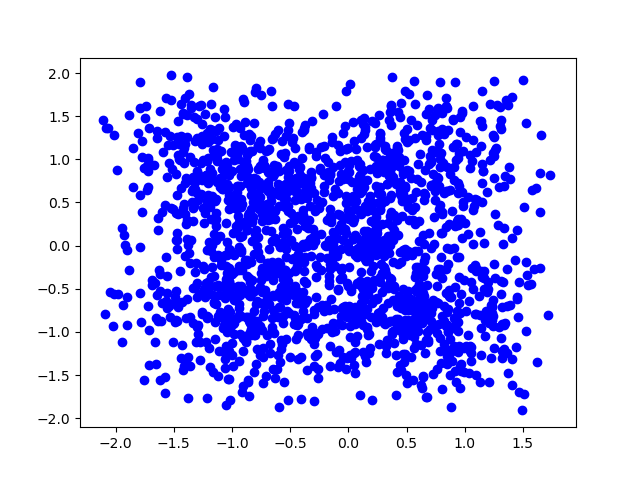

In [17]:
# Make a movie out of this
import matplotlib.animation as animation
%matplotlib widget

fig = plt.figure()

imgs = []
for t in range(X.shape[0]):
    X_curr = X[t]
    im = plt.scatter(X_curr[:,0], X_curr[:, 1], c='blue')
    imgs.append([im])

ani = animation.ArtistAnimation(fig, imgs, interval=500, blit=True,
                                repeat_delay=1000)
ani.save(path+'dynamic_evolution.mp4')

# plt.show()

In [ ]:
# TODO identify the nodes. Which node is which?